In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
PATH = "chennai_house_price.csv"
dataset = pd.read_csv(PATH)
important_columns = ["price", "area", "status", "bhk", "bathroom", "age"]
dataset = dataset[important_columns].copy()
dataset["status"] = dataset["status"].replace({"Ready to move": 1, "Under Construction": 0}) # Делаем статусы целочисленными
dataset.dropna(inplace=True) # Удалили строки со значением Nan
dataset.reset_index(drop=True, inplace=True) # Пронумеровал id заново
dataset.rename(columns={"bhk": "bedrooms"}, inplace=True) # Изменить название столбца
dataset['price'] = dataset['price'].astype(int)
dataset.head(10)

,price,area,status,bedrooms,bathroom,age
0,49,1028,1,2,2.0,3.0
1,42,588,0,2,1.0,0.0
2,188,2221,0,3,3.0,0.0
3,240,1500,1,3,3.0,1.0
4,113,2343,1,4,4.0,5.0
5,50,1045,1,2,2.0,1.0
6,57,920,0,2,1.0,0.0
7,42,588,0,2,1.0,0.0
8,50,1152,1,2,3.0,1.0
9,47,920,0,2,2.0,0.0


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Внутри-кластерная сумма расстояния')

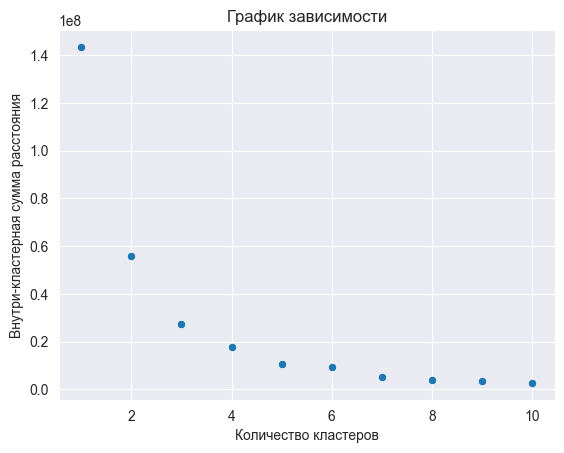

In [3]:
inertia = []

for i in range(1, 11):
  k_means = KMeans(n_clusters=i, init= "k-means++", n_init="auto")
  k_means.fit(
      dataset.drop(
          "price",
          axis=1,
      )
  )
  inertia.append(k_means.inertia_)

sns.set_style("darkgrid")
sns.scatterplot(
    x=[x for x in range(1, 11)],
    y=inertia,
)

plt.title("График зависимости")
plt.xlabel("Количество кластеров")
plt.ylabel("Внутри-кластерная сумма расстояния")

In [5]:
CLUSTERS = 6

model = KMeans(
    n_clusters=CLUSTERS
)

model.fit(
    dataset.drop(
        "price",
        axis=1,
    )
)

clusters = pd.DataFrame(
    columns=dataset.columns.drop("price"),
    data=model.cluster_centers_
)

clusters["Amount"] = np.unique(
    model.labels_,
    return_counts=True
)[1]

clusters

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,area,status,bedrooms,bathroom,age,Amount
0,1342.678832,0.583942,2.700730,2.481752,1.700730,137
1,675.269939,0.815951,1.687117,1.766871,2.834356,160
2,2336.448276,0.655172,3.517241,3.241379,2.827586,29
3,1004.507772,0.756477,2.062176,2.051813,2.911917,196
4,1772.923077,0.653846,3.000000,2.807692,2.596154,52
5,3386.833333,0.833333,3.833333,4.166667,3.833333,6
